In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc,confusion_matrix,precision_recall_fscore_support,roc_auc_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import plotly.express as px
import plotly.figure_factory as ff

from sklearn.cluster import KMeans


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/creditcard.csv',delimiter=',',header=0)

In [ ]:
dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(dataset.shape)

(284807, 31)


The dataset for the credit card fraudulent detection contains transaction over a period of 2 days. The dataset contain 31 columns with 29 attributes, 1 timestamp and amount of money transacted. The labels column contains two classifications namely fraudulent or non fraudulent. 

The dataset attributes v1-v28 is completely anonymised through PCA. 
 

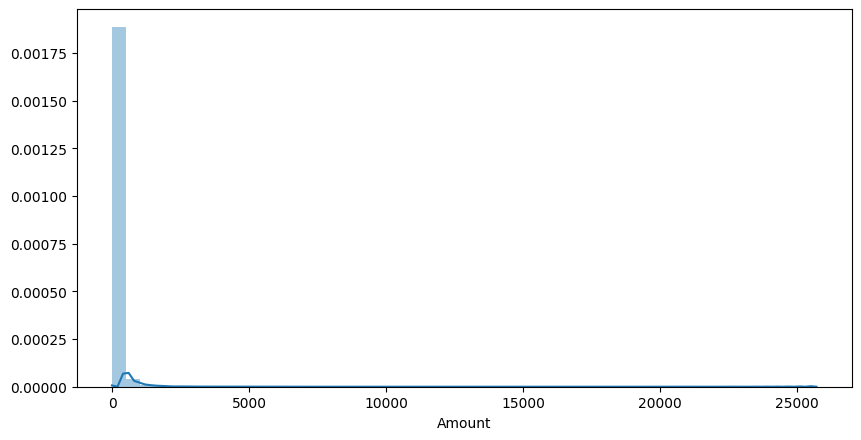

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.distplot(dataset['Amount'])

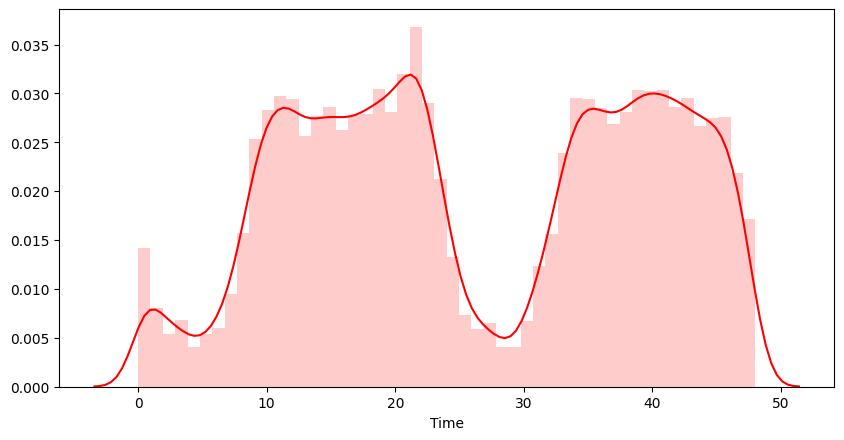

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.distplot(dataset['Time']/(3600),color='r',hist_kws={'alpha':0.2,'linewidth':1},label= 'time in hrs')

In [ ]:
classes = dataset.Class.unique()

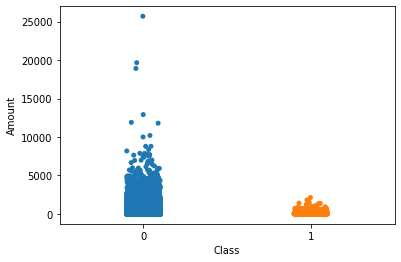

In [ ]:
sns.stripplot(x=dataset['Class'],y=dataset['Amount'],data=dataset,jitter=True,size=5)

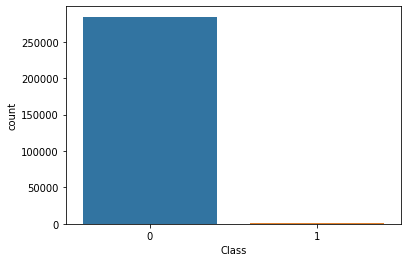

In [ ]:
sns.countplot(x='Class',data=dataset)

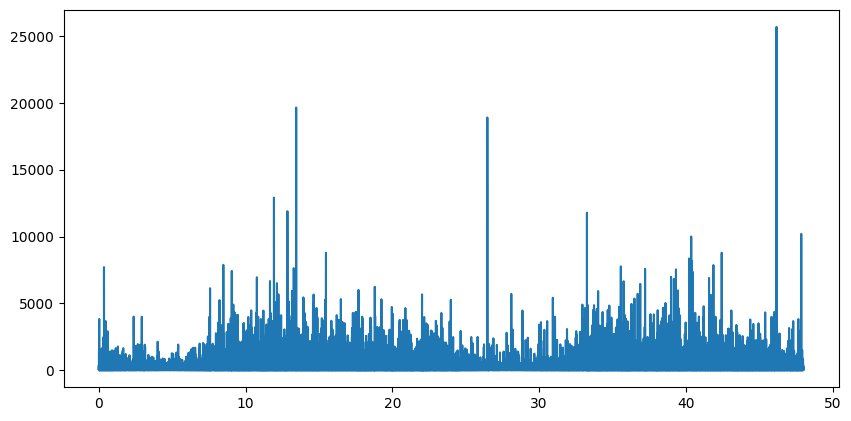

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(dataset['Time']/(3600),dataset['Amount'])


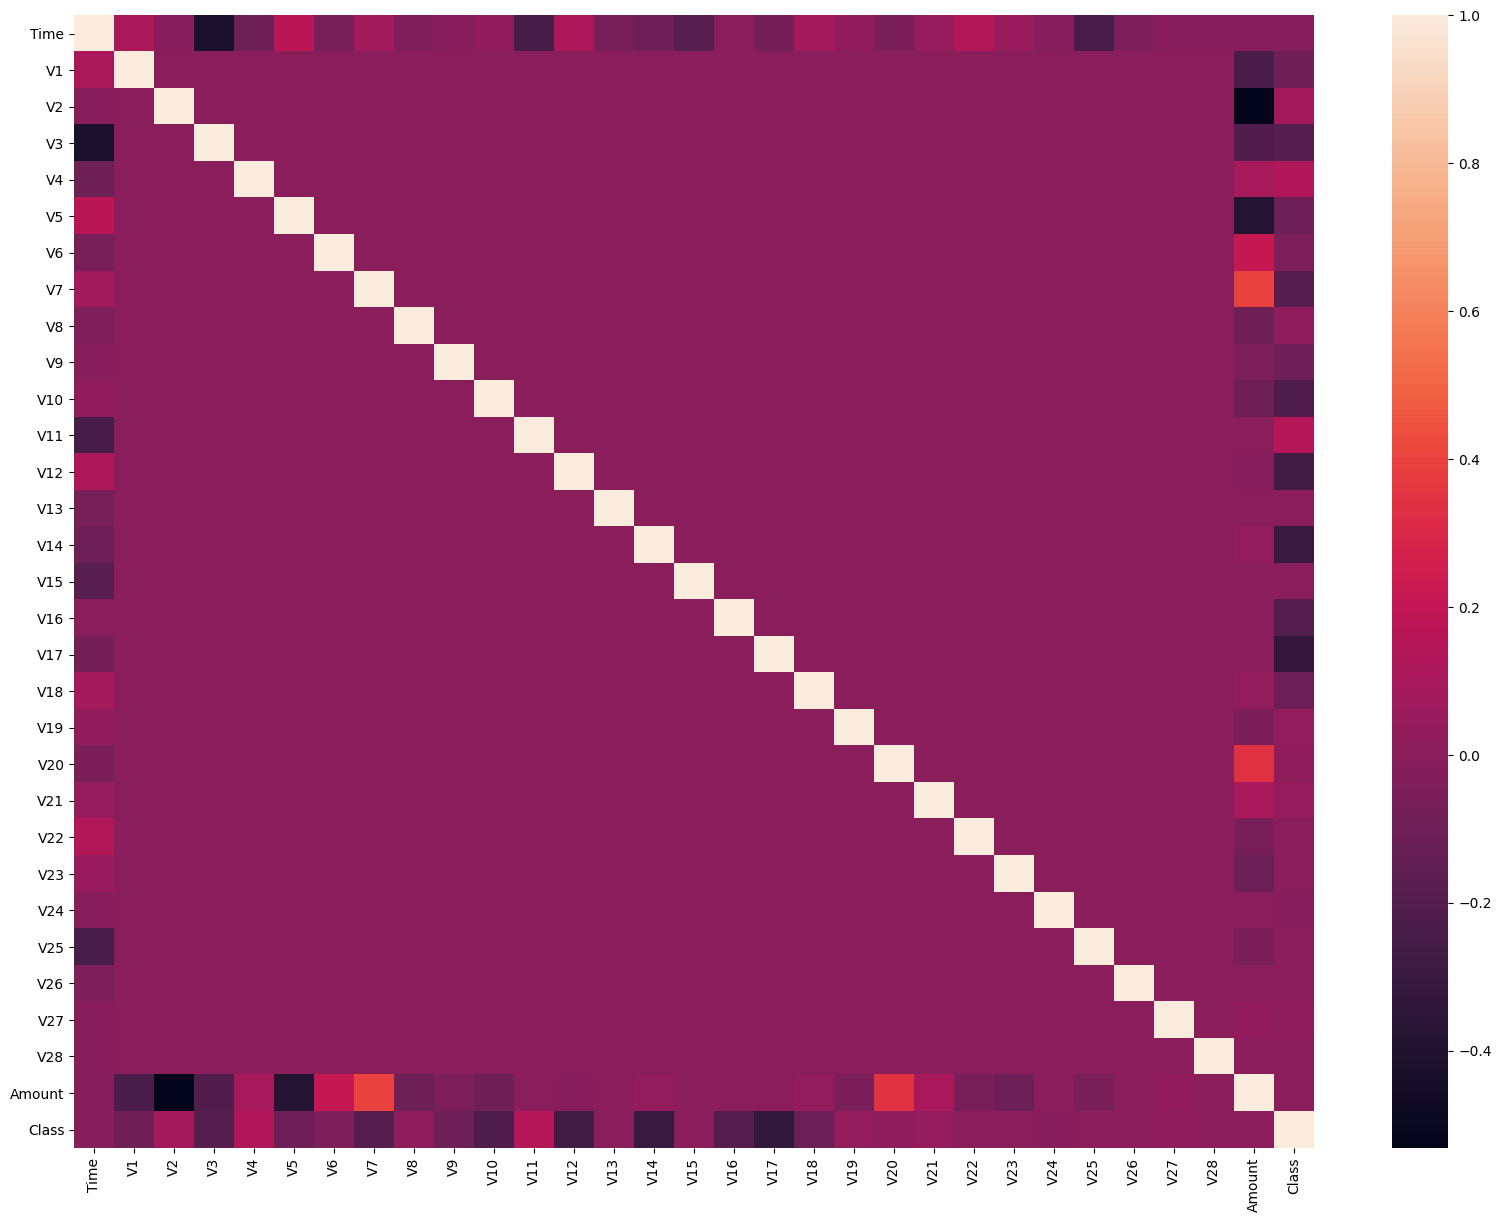

In [ ]:
plt.figure(figsize=(20,15),dpi=100)
sns.heatmap(dataset.corr())

In [ ]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#scaler = MinMaxScaler(feature_range=(0,1))
#data_scaled = scaler.fit_transform(dataset)
#data_scaled = pd.DataFrame(data_scaled,columns=dataset.columns)

In [ ]:
corr_map =np.round(dataset.corr(),2)

In [ ]:
#corr_data = corr_map[(corr_map['Class'] >0.4) | (corr_map['Class'] < -0.4)]

In [ ]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

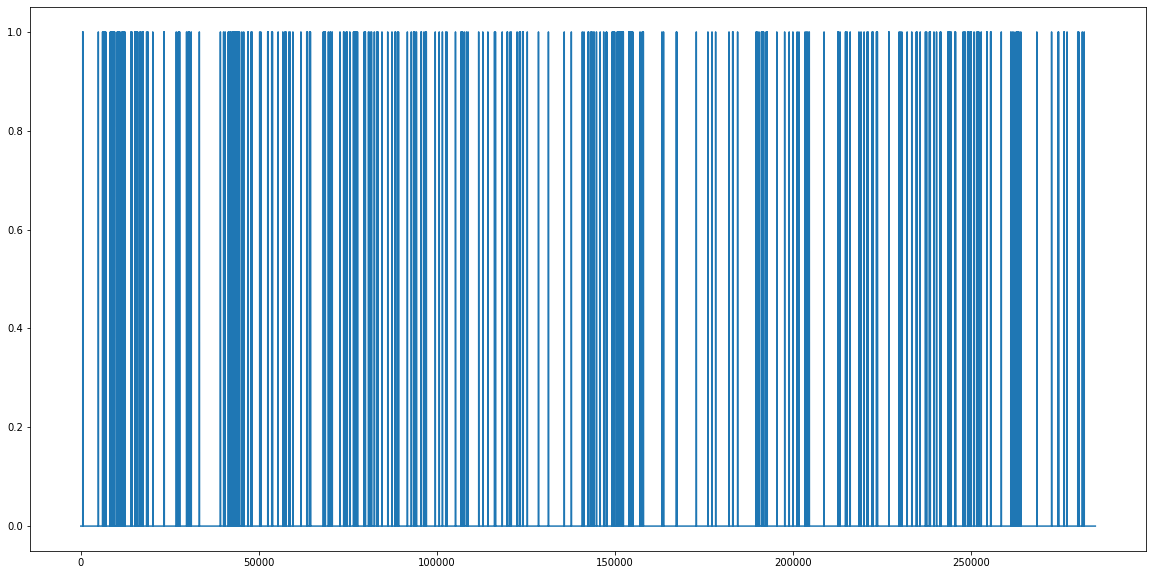

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(dataset['Class'])

In [ ]:
subdataset_nonfrauds = dataset[dataset['Class']==0].sample(2*dataset['Class'].value_counts()[1])

In [ ]:
subdataset_frauds = dataset[dataset['Class']==1]

In [ ]:
subdataset_ = pd.concat((subdataset_frauds,subdataset_nonfrauds),axis=0,ignore_index=True)

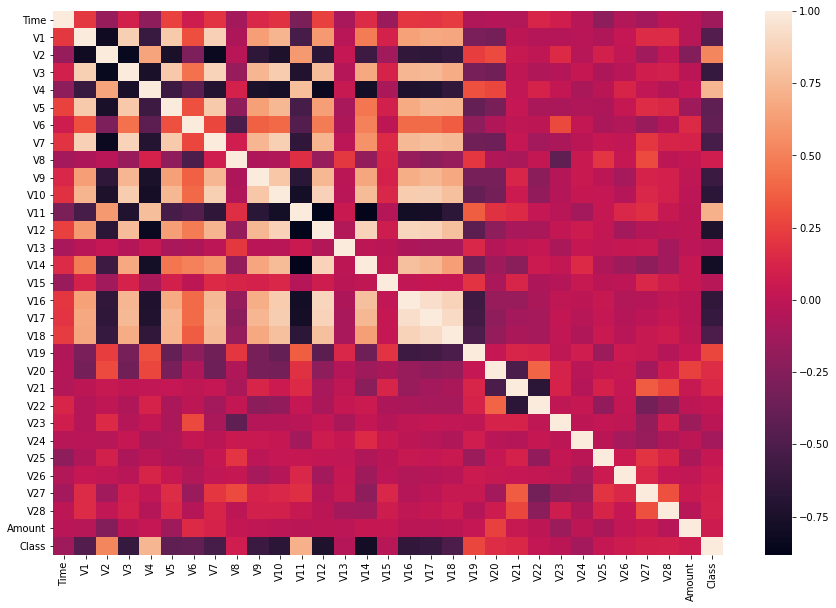

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(subdataset_.corr())

In [ ]:
subdataset_ = subdataset_.sample(frac=1).reset_index(drop=True)

In [ ]:
corr_data_subset = subdataset_.corr()

In [ ]:
corr_data_subset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.216940,-0.173308,0.098679,-0.209215,0.264520,0.073484,0.196132,-0.117013,0.132558,0.188186,-0.288364,0.245725,-0.102374,0.155126,-0.154709,0.211713,0.205467,0.228857,-0.065234,-0.047031,-0.056733,0.130262,0.081734,-0.032829,-0.212079,-0.057935,-0.120324,-0.003021,-0.029191,-0.141745
V1,0.216940,1.000000,-0.802793,0.857767,-0.597848,0.833778,0.304760,0.866624,-0.077017,0.631412,0.728075,-0.535413,0.609343,-0.028901,0.479747,0.107989,0.644388,0.682265,0.665248,-0.297818,-0.316691,-0.000665,-0.039344,-0.045151,-0.023613,-0.066369,0.024934,0.161387,0.155144,-0.035591,-0.477129
V2,-0.173308,-0.802793,1.000000,-0.839706,0.658975,-0.751940,-0.284212,-0.829285,-0.023724,-0.650409,-0.742251,0.609803,-0.667137,0.022656,-0.585117,-0.130418,-0.634430,-0.647026,-0.612486,0.236909,0.293811,0.040989,0.000672,0.149360,-0.031493,0.098325,0.010028,-0.129624,0.011536,-0.256573,0.522322
V3,0.098679,0.857767,-0.839706,1.000000,-0.755366,0.825663,0.436203,0.881436,-0.167890,0.738650,0.840434,-0.718786,0.771469,-0.044128,0.678404,0.117159,0.735392,0.751513,0.697374,-0.315249,-0.344575,0.005419,-0.069205,-0.037162,0.033328,-0.074522,-0.029012,0.082902,0.096239,-0.019144,-0.613078
V4,-0.209215,-0.597848,0.658975,-0.755366,1.000000,-0.579929,-0.426746,-0.705609,0.104409,-0.749284,-0.777942,0.774674,-0.824304,0.038112,-0.784631,-0.091913,-0.723439,-0.714095,-0.632217,0.312408,0.272237,0.009478,0.112767,0.016985,-0.090196,-0.021813,0.118892,0.010419,-0.039489,0.023892,0.736085
V5,0.264520,0.833778,-0.751940,0.825663,-0.579929,1.000000,0.316272,0.834230,-0.202406,0.634461,0.745788,-0.530411,0.625246,-0.095476,0.460570,0.096215,0.690021,0.742608,0.731141,-0.392494,-0.307463,0.024868,-0.089587,-0.082742,-0.073059,-0.076976,0.036058,0.168255,0.145362,-0.132441,-0.418644
V6,0.073484,0.304760,-0.284212,0.436203,-0.426746,0.316272,1.000000,0.274989,-0.507681,0.372450,0.409494,-0.471605,0.483488,-0.078779,0.504313,-0.007081,0.416404,0.416283,0.355511,-0.207329,-0.065118,0.004321,-0.004336,0.282531,0.014970,-0.081300,-0.051421,-0.156170,-0.047501,0.148067,-0.408614
V7,0.196132,0.866624,-0.829285,0.881436,-0.705609,0.834230,0.274989,1.000000,0.080746,0.740279,0.858470,-0.645972,0.729874,-0.014236,0.576807,0.151152,0.750666,0.778790,0.752249,-0.343223,-0.346853,0.027234,-0.111312,-0.084708,-0.018441,0.033976,0.011011,0.206662,0.122644,0.111683,-0.529865
V8,-0.117013,-0.077017,-0.023724,-0.167890,0.104409,-0.202406,-0.507681,0.080746,1.000000,-0.074702,-0.059622,0.176460,-0.169835,0.218817,-0.189873,0.123104,-0.173423,-0.219923,-0.176201,0.210621,-0.062850,-0.085065,0.018832,-0.413066,0.045858,0.200233,0.036475,0.288673,-0.000101,0.020181,0.073781
V9,0.132558,0.631412,-0.650409,0.738650,-0.749284,0.634461,0.372450,0.740279,-0.074702,1.000000,0.818613,-0.672223,0.746009,-0.020432,0.664060,0.108714,0.705703,0.739465,0.678992,-0.310007,-0.311343,0.126278,-0.217164,-0.044559,0.046152,-0.011428,-0.109937,0.115551,0.100866,0.005026,-0.589150


In [ ]:
corr_data_subset = corr_data_subset[(corr_data_subset['Class'] >0.5) | (corr_data_subset['Class'] < -0.5)]

In [ ]:
corr_data_subset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V2,-0.173308,-0.802793,1.000000,-0.839706,0.658975,-0.751940,-0.284212,-0.829285,-0.023724,-0.650409,-0.742251,0.609803,-0.667137,0.022656,-0.585117,-0.130418,-0.634430,-0.647026,-0.612486,0.236909,0.293811,0.040989,0.000672,0.149360,-0.031493,0.098325,0.010028,-0.129624,0.011536,-0.256573,0.522322
V3,0.098679,0.857767,-0.839706,1.000000,-0.755366,0.825663,0.436203,0.881436,-0.167890,0.738650,0.840434,-0.718786,0.771469,-0.044128,0.678404,0.117159,0.735392,0.751513,0.697374,-0.315249,-0.344575,0.005419,-0.069205,-0.037162,0.033328,-0.074522,-0.029012,0.082902,0.096239,-0.019144,-0.613078
V4,-0.209215,-0.597848,0.658975,-0.755366,1.000000,-0.579929,-0.426746,-0.705609,0.104409,-0.749284,-0.777942,0.774674,-0.824304,0.038112,-0.784631,-0.091913,-0.723439,-0.714095,-0.632217,0.312408,0.272237,0.009478,0.112767,0.016985,-0.090196,-0.021813,0.118892,0.010419,-0.039489,0.023892,0.736085
V7,0.196132,0.866624,-0.829285,0.881436,-0.705609,0.834230,0.274989,1.000000,0.080746,0.740279,0.858470,-0.645972,0.729874,-0.014236,0.576807,0.151152,0.750666,0.778790,0.752249,-0.343223,-0.346853,0.027234,-0.111312,-0.084708,-0.018441,0.033976,0.011011,0.206662,0.122644,0.111683,-0.529865
V9,0.132558,0.631412,-0.650409,0.738650,-0.749284,0.634461,0.372450,0.740279,-0.074702,1.000000,0.818613,-0.672223,0.746009,-0.020432,0.664060,0.108714,0.705703,0.739465,0.678992,-0.310007,-0.311343,0.126278,-0.217164,-0.044559,0.046152,-0.011428,-0.109937,0.115551,0.100866,0.005026,-0.589150
V10,0.188186,0.728075,-0.742251,0.840434,-0.777942,0.745788,0.409494,0.858470,-0.059622,0.818613,1.000000,-0.780320,0.870755,-0.026264,0.760341,0.136426,0.840693,0.849635,0.779495,-0.394719,-0.319495,0.053375,-0.191207,-0.041694,0.034367,0.026319,-0.051115,0.135992,0.101949,-0.010557,-0.667298
V11,-0.288364,-0.535413,0.609803,-0.718786,0.774674,-0.530411,-0.471605,-0.645972,0.176460,-0.672223,-0.780320,1.000000,-0.882091,0.046277,-0.870292,-0.041618,-0.791476,-0.774708,-0.657265,0.362253,0.186127,0.152115,0.023952,-0.027408,-0.117414,0.035670,0.136782,0.171634,0.037656,-0.015531,0.717770
V12,0.245725,0.609343,-0.667137,0.771469,-0.824304,0.625246,0.483488,0.729874,-0.169835,0.746009,0.870755,-0.882091,1.000000,-0.054267,0.879303,0.070318,0.891801,0.876616,0.785401,-0.432649,-0.211800,-0.100024,-0.092863,0.017532,0.061390,0.018143,-0.117281,-0.044918,-0.015434,-0.001460,-0.729177
V14,0.155126,0.479747,-0.585117,0.678404,-0.784631,0.460570,0.504313,0.576807,-0.189873,0.664060,0.760341,-0.870292,0.879303,-0.000416,1.000000,0.007138,0.784762,0.749844,0.629482,-0.357124,-0.136292,-0.233433,0.057387,0.020769,0.150781,-0.070936,-0.143303,-0.209816,-0.126431,0.029711,-0.787262
V16,0.211713,0.644388,-0.634430,0.735392,-0.723439,0.690021,0.416404,0.750666,-0.173423,0.705703,0.840693,-0.791476,0.891801,-0.078857,0.784762,0.010085,1.000000,0.939661,0.880207,-0.578448,-0.166842,-0.166616,-0.093446,0.004262,0.000078,0.041043,-0.057507,-0.038845,0.000294,-0.019285,-0.638801


In [ ]:
new_attributes = corr_data_subset.index

In [ ]:
newsubdataset_ = subdataset_[list(new_attributes)]

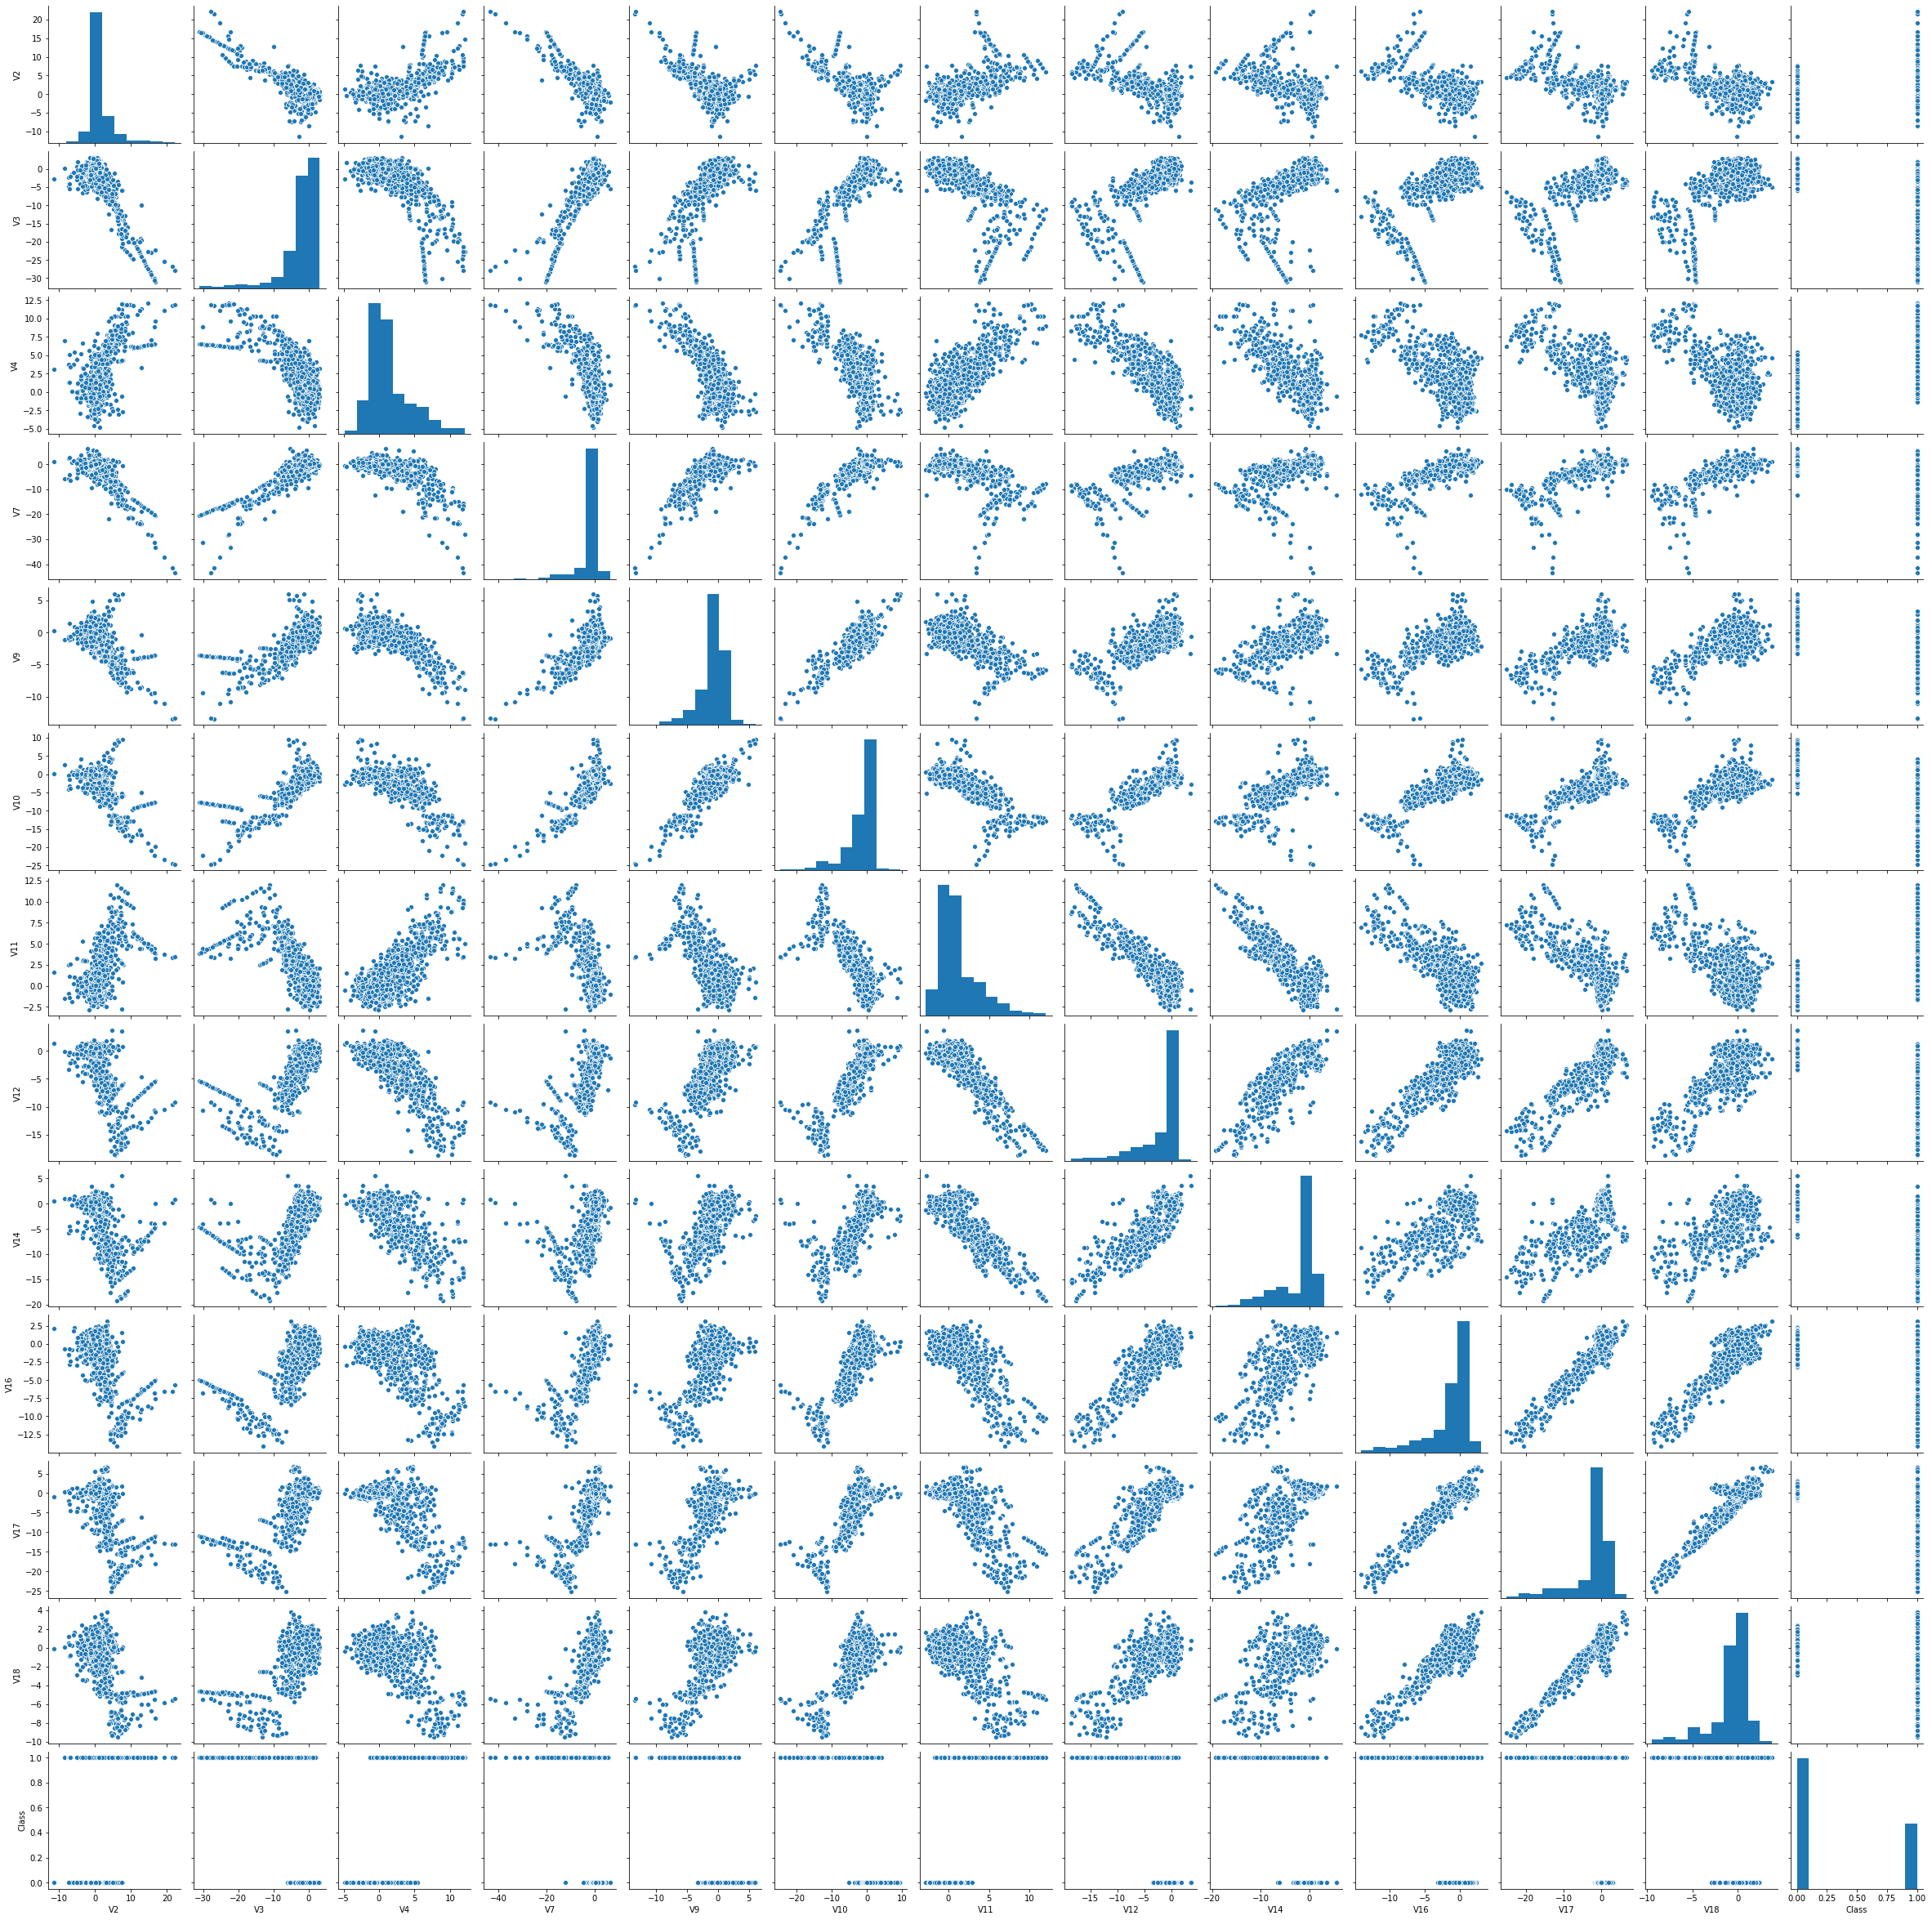

In [ ]:
sns.pairplot(newsubdataset_)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
data_embedded = TSNE(2,random_state=42,learning_rate=30).fit_transform((newsubdataset_.values)[:,:-1])
#pca = PCA(n_components = 2,svd_solver='full')
#data_embedded = pca.fit_transform((newsubdataset_.values)[:,:-1])
newsubdataset_scaled = scaler.fit_transform(data_embedded)


In [ ]:
data_embedded

array([[ 17.42169   , -32.217422  ],
       [  0.21528123,  -0.36909375],
       [  8.521497  ,  -6.9515147 ],
       ...,
       [-22.92639   , -25.842781  ],
       [ -7.1588225 , -12.449895  ],
       [  0.72598404, -16.317047  ]], dtype=float32)

In [ ]:
# k-means clustering 
n_cluster = 2
kmeans = KMeans(n_jobs = -1,n_clusters = 2,init = 'k-means++')
kmeans.fit((newsubdataset_scaled))
pred = kmeans.predict((newsubdataset_scaled))

In [ ]:
newsubdataset_descaled = scaler.inverse_transform(data_embedded)

In [ ]:
data_embedded = pd.DataFrame(newsubdataset_descaled,columns = ['var1','var2'])

In [ ]:
data_embedded['cluster_class'] = pred

In [ ]:
data_embedded['cluster_class'].value_counts()

0    930
1    546
Name: cluster_class, dtype: int64

In [ ]:
data_embedded_scaled = scaler.fit_transform(data_embedded.values)
data_embedded_scaled = pd.DataFrame(data_embedded_scaled,columns = data_embedded.columns)

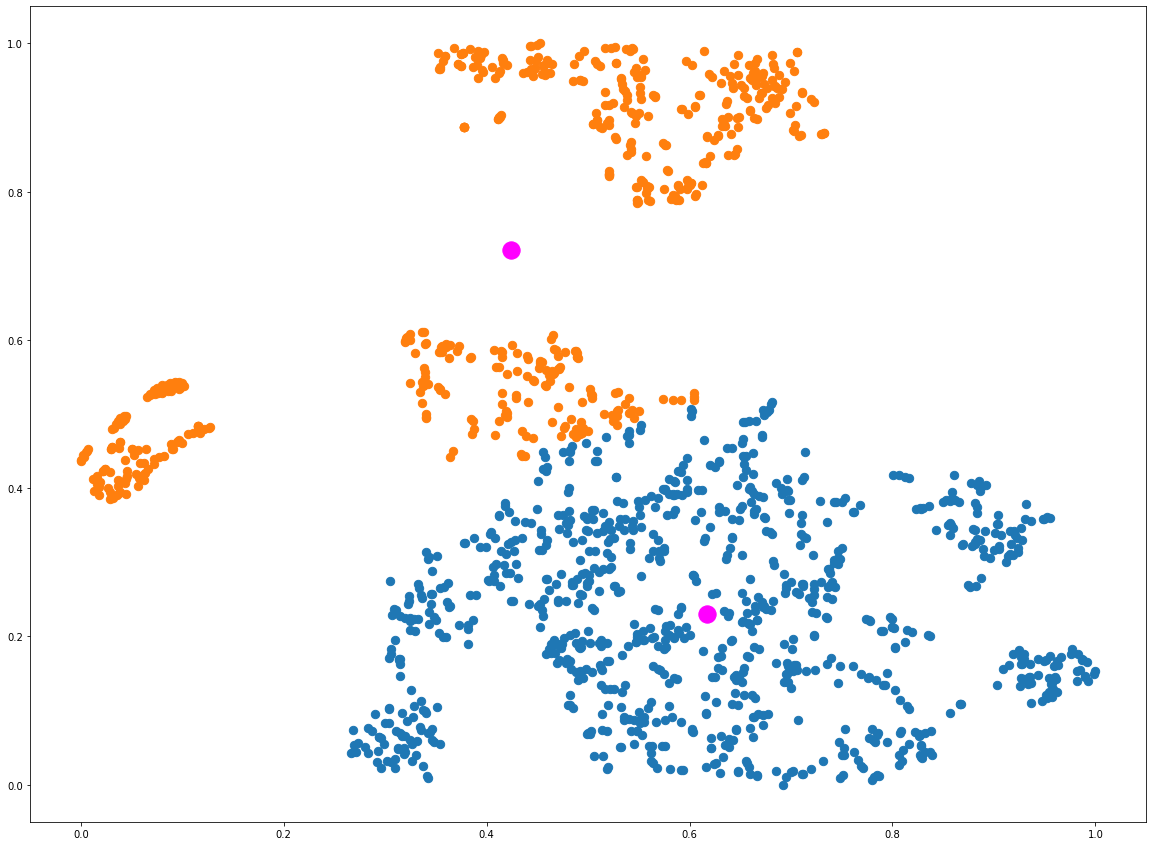

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(data_embedded_scaled['var1'][data_embedded_scaled['cluster_class']==0],data_embedded_scaled['var2'][data_embedded_scaled['cluster_class']==0],s=70,cmap ='prism',marker='o')
plt.scatter(data_embedded_scaled['var1'][data_embedded_scaled['cluster_class']==1],data_embedded_scaled['var2'][data_embedded_scaled['cluster_class']==1],s=70,cmap ='prism',marker='o')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='magenta', label = 'Centroids',marker = 'o')    


In [ ]:
Y_pred = pred.reshape(-1,1)
Y_true = newsubdataset_.values[:,-1].reshape(-1,1)

In [ ]:
from sklearn.metrics import roc_curve, auc


In [ ]:
fpr,tpr,_ = roc_curve(Y_true,Y_pred)

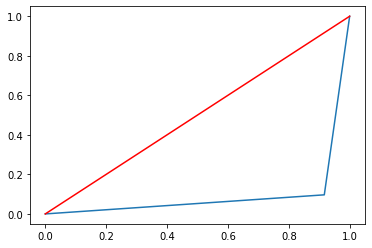

In [ ]:
plt.plot(tpr,fpr)
plt.plot((0,1),(0,1),'-r')

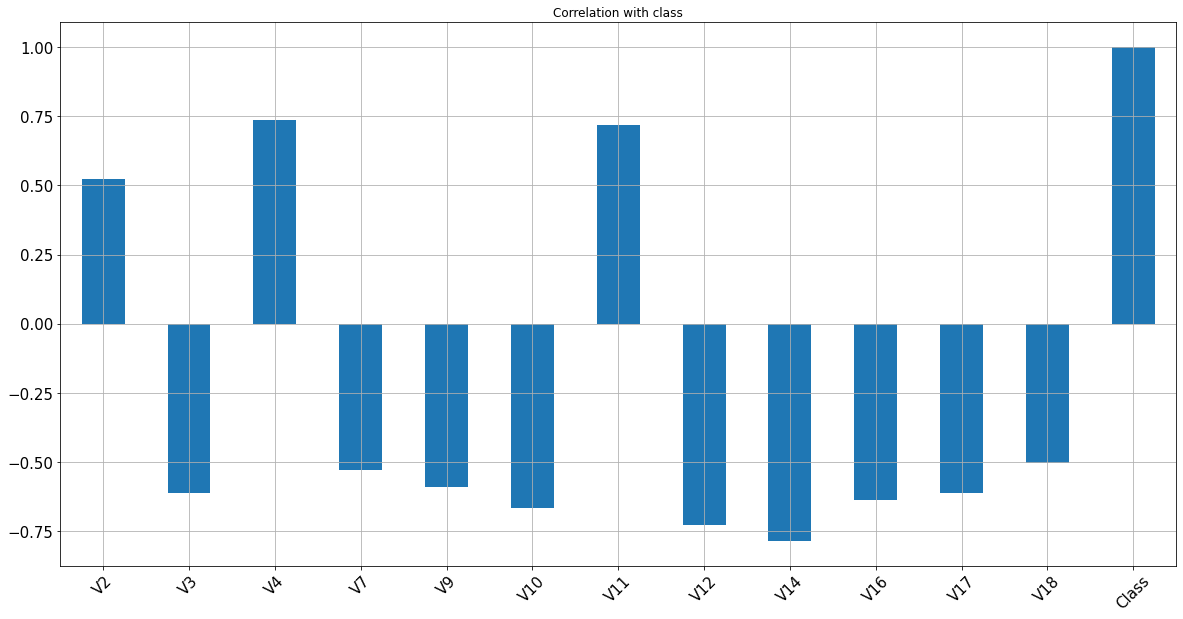

In [ ]:
newsubdataset_.corrwith(newsubdataset_.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = newsubdataset_.drop(labels = 'Class',axis = 1,inplace = False)
Y = newsubdataset_.pop('Class')

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,shuffle = True,random_state = 42)

In [ ]:
X_train = X_train.values
X_test = X_test.values

In [ ]:
Y_train = Y_train.values
Y_test = Y_test.values

In [ ]:
model = LogisticRegression()

model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
precision_recall_fscore_support(Y_test,Y_pred,)

(array([0.95049505, 0.95744681]),
 array([0.97959184, 0.9       ]),
 array([0.96482412, 0.92783505]),
 array([98, 50]))

In [ ]:
confusion_matrix(Y_test,Y_pred)

array([[96,  2],
       [ 5, 45]])

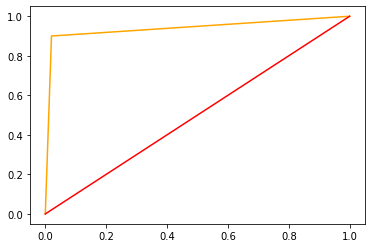

In [ ]:
fpr,tpr,_ = roc_curve(Y_test,Y_pred)
plt.plot(fpr,tpr,'-',color = 'orange')
plt.plot((0,1),(0,1),'-r')

In [ ]:
roc_auc_score(Y_test,Y_pred)

0.9397959183673469